In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from tabulate import tabulate
import statsmodels
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [27]:
def calculate_t_stat_intercept(model, X, y):
    n = len(X)
    mse = np.mean((model.predict(X) - y) ** 2)  # Mean squared error
    mean_X = np.mean(X)
    X_diff = X - mean_X
    sum_X_diff_sq = np.sum(X_diff ** 2)
    se_intercept = np.sqrt(mse * (1/n + (mean_X ** 2) / sum_X_diff_sq))

    # Calculate t-statistic
    t_stat_intercept = model.intercept_ / se_intercept

    return [float(t_stat_intercept),float(se_intercept)]
def calculate_t_stat_coeff(model,X,y):
    coefficients = model.coef_

    # Get the standard error of the coefficients
    # Formula: standard error = sqrt(MSE / sum((X - mean(X))^2))
    n = len(X)
    mse = np.mean((model.predict(X) - y) ** 2)  # Mean squared error
    mean_X = np.mean(X)
    X_diff = X - mean_X
    sum_X_diff_sq = np.sum(X_diff ** 2)
    se_coefficient = np.sqrt(mse / sum_X_diff_sq)

    # Calculate t-statistic for the coefficient
    t_stat_coefficient = coefficients / se_coefficient

    return [float(t_stat_coefficient),float(se_coefficient)]

def calculate_model_statistics(residuals):
    # coefficients = model.coef_
    mean = np.mean(residuals)
    median = np.median(residuals)
    minimum = np.min(residuals)
    maximum = np.max(residuals)
    
    stats = {'Mean': mean, 'Median': median, 'Minimum': minimum, 'Maximum': maximum}
    
    return stats

# # Example usage:
# model_statistics = calculate_model_statistics(model)
# print("Mean of coefficients:", model_statistics['Mean'])
# print("Median of coefficients:", model_statistics['Median'])
# print("Minimum of coefficients:", model_statistics['Minimum'])
# print("Maximum of coefficients:", model_statistics['Maximum'])

In [28]:
gwq='calcium'
# reading data from the csv
data = pd.read_csv(r"..\Excels\merged_table.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data[gwq] = pd.to_numeric(data[gwq], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', gwq], inplace=True)

# defining the variables
X = data[['SDP']]  # Feature matrix
y = data[gwq]  # Target variable

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model to the entire data
model.fit(X, y)

# Make predictions on the entire data
y_pred = model.predict(X)

# Calculate SSR, SST, and SSE
mean_y = np.mean(y)
SSR = np.sum((y_pred - y) ** 2)
SST = np.sum((y - mean_y) ** 2)
SSE = np.sum((y_pred-mean_y) ** 2)

# Print SSR, SST, and SSE
print("SSR (Sum of Squares Residual):", SSR)
print("SST (Sum of Squares Total):", SST)
print("SSE (Sum of Squares Explained):", SSE)



R2 = 1 - (SSR / SST)

# Print coefficients of regression
print("Coefficients of Regression:")
for i, coef in enumerate(model.coef_):
    print(f"  Coefficient {i+1}: {coef}")

print("Intercept:", model.intercept_)

# Print R-squared (R²) score
print("R-squared (R²) Score:", R2)


print("Sum of Residuals ", np.sum(( y-y_pred)))


t_stat_int = calculate_t_stat_intercept(model, X, y)
print("T-statistics for Coefficients:", t_stat_int)
t_stat_coef=calculate_t_stat_coeff(model,X,y)
print("t-statistic of Coefficients:", t_stat_coef)

print(calculate_model_statistics(y-y_pred))




SSR (Sum of Squares Residual): 11186208.637032362
SST (Sum of Squares Total): 11438801.44197314
SSE (Sum of Squares Explained): 252592.80494078074
Coefficients of Regression:
  Coefficient 1: 3.159791713381556e-05
Intercept: 55.367403782132776
R-squared (R²) Score: 0.022082104162934768
Sum of Residuals  1.2732925824820995e-11
T-statistics for Coefficients: [79.85627099481533, 0.6933382074117573]
t-statistic of Coefficients: [12.846890165430581, 2.4595771215388536e-06]
{'Mean': 1.7420886338515522e-15, 'Median': -7.14932816468734, 'Minimum': -74.1162219975986, 'Maximum': 433.5032856130688}


c:\Users\baljyot\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\baljyot\AppData\Local\Temp\ipykernel_29084\4184821329.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(t_stat_intercept),float(se_intercept)]
c:\Users\baljyot\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwar

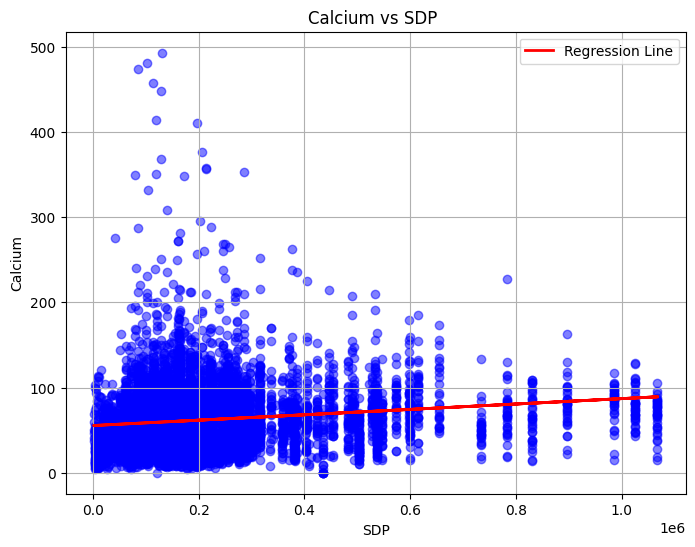

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, model.coef_[0] * X + model.intercept_, color='red', linewidth=2, label='Regression Line')
plt.title("Calcium vs SDP ")
plt.xlabel("SDP")
plt.ylabel("Calcium")
plt.grid(True)
plt.legend()
plt.show()

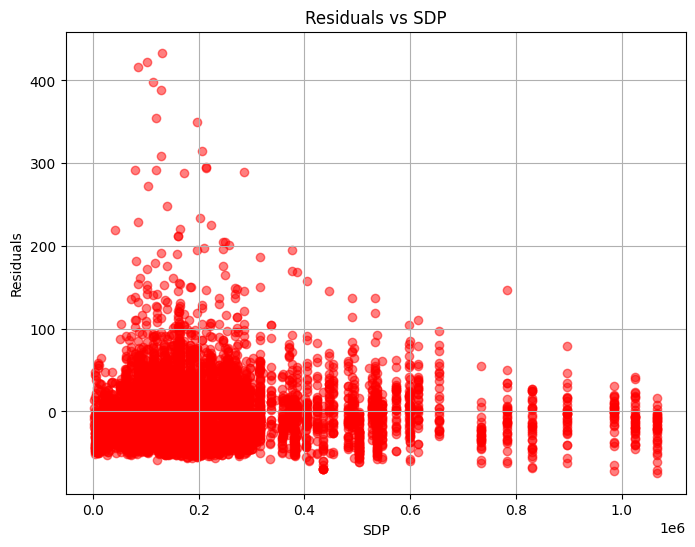

In [6]:
# Plot residuals vs calcium
residuals=y-y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X, np.array(y-y_pred), color='red', alpha=0.5)
plt.title("Residuals vs SDP")
plt.xlabel("SDP")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

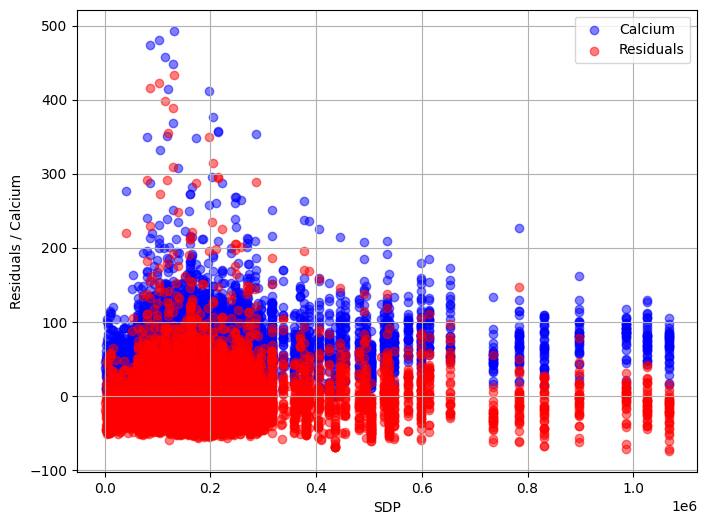

In [7]:
import matplotlib.pyplot as plt

# Plot residuals vs calcium
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Calcium')  # Add label for calcium
plt.scatter(X, residuals, color='red', alpha=0.5, label='Residuals')  # Add label for residuals

# Add title and labels
# plt.title("Groundwater Quality (Calcium) vs SDP Residuals")
plt.xlabel("SDP")
plt.ylabel("Residuals / Calcium")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()


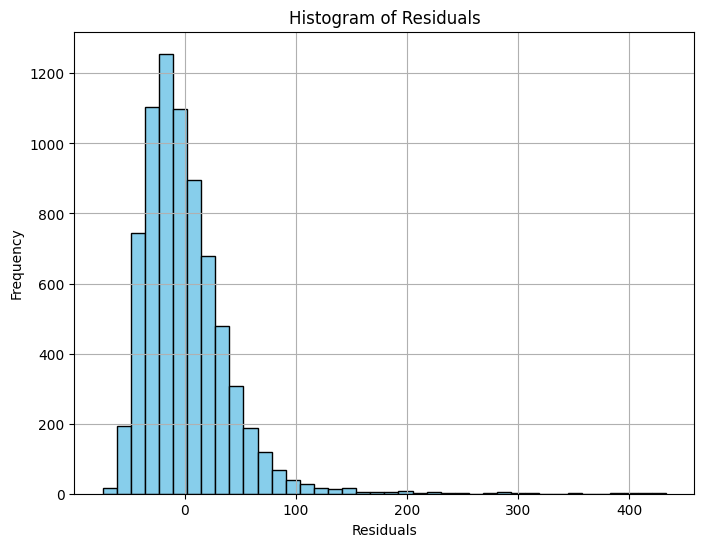

In [8]:
plt.figure(figsize=(8, 6))
# plt.hist(residuals, bins=40, color='#fa50ef', edgecolor='black')
plt.hist(residuals, bins=40, color='skyblue', edgecolor='black')

plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()